# Load csv file

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#load data winequality-red.csv 
data_red = pd.read_csv("..\\data\\winequality-red.csv", sep =";")
data_red.head()

c:\users\ameli\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
data_red["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [3]:
# to check null values
# data types from each columns
data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
bins = [0, 5, 10]    
labels = ["bad", "good"]    
data_red["quality"]= pd.cut(data_red.quality, bins=bins, labels=labels)
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


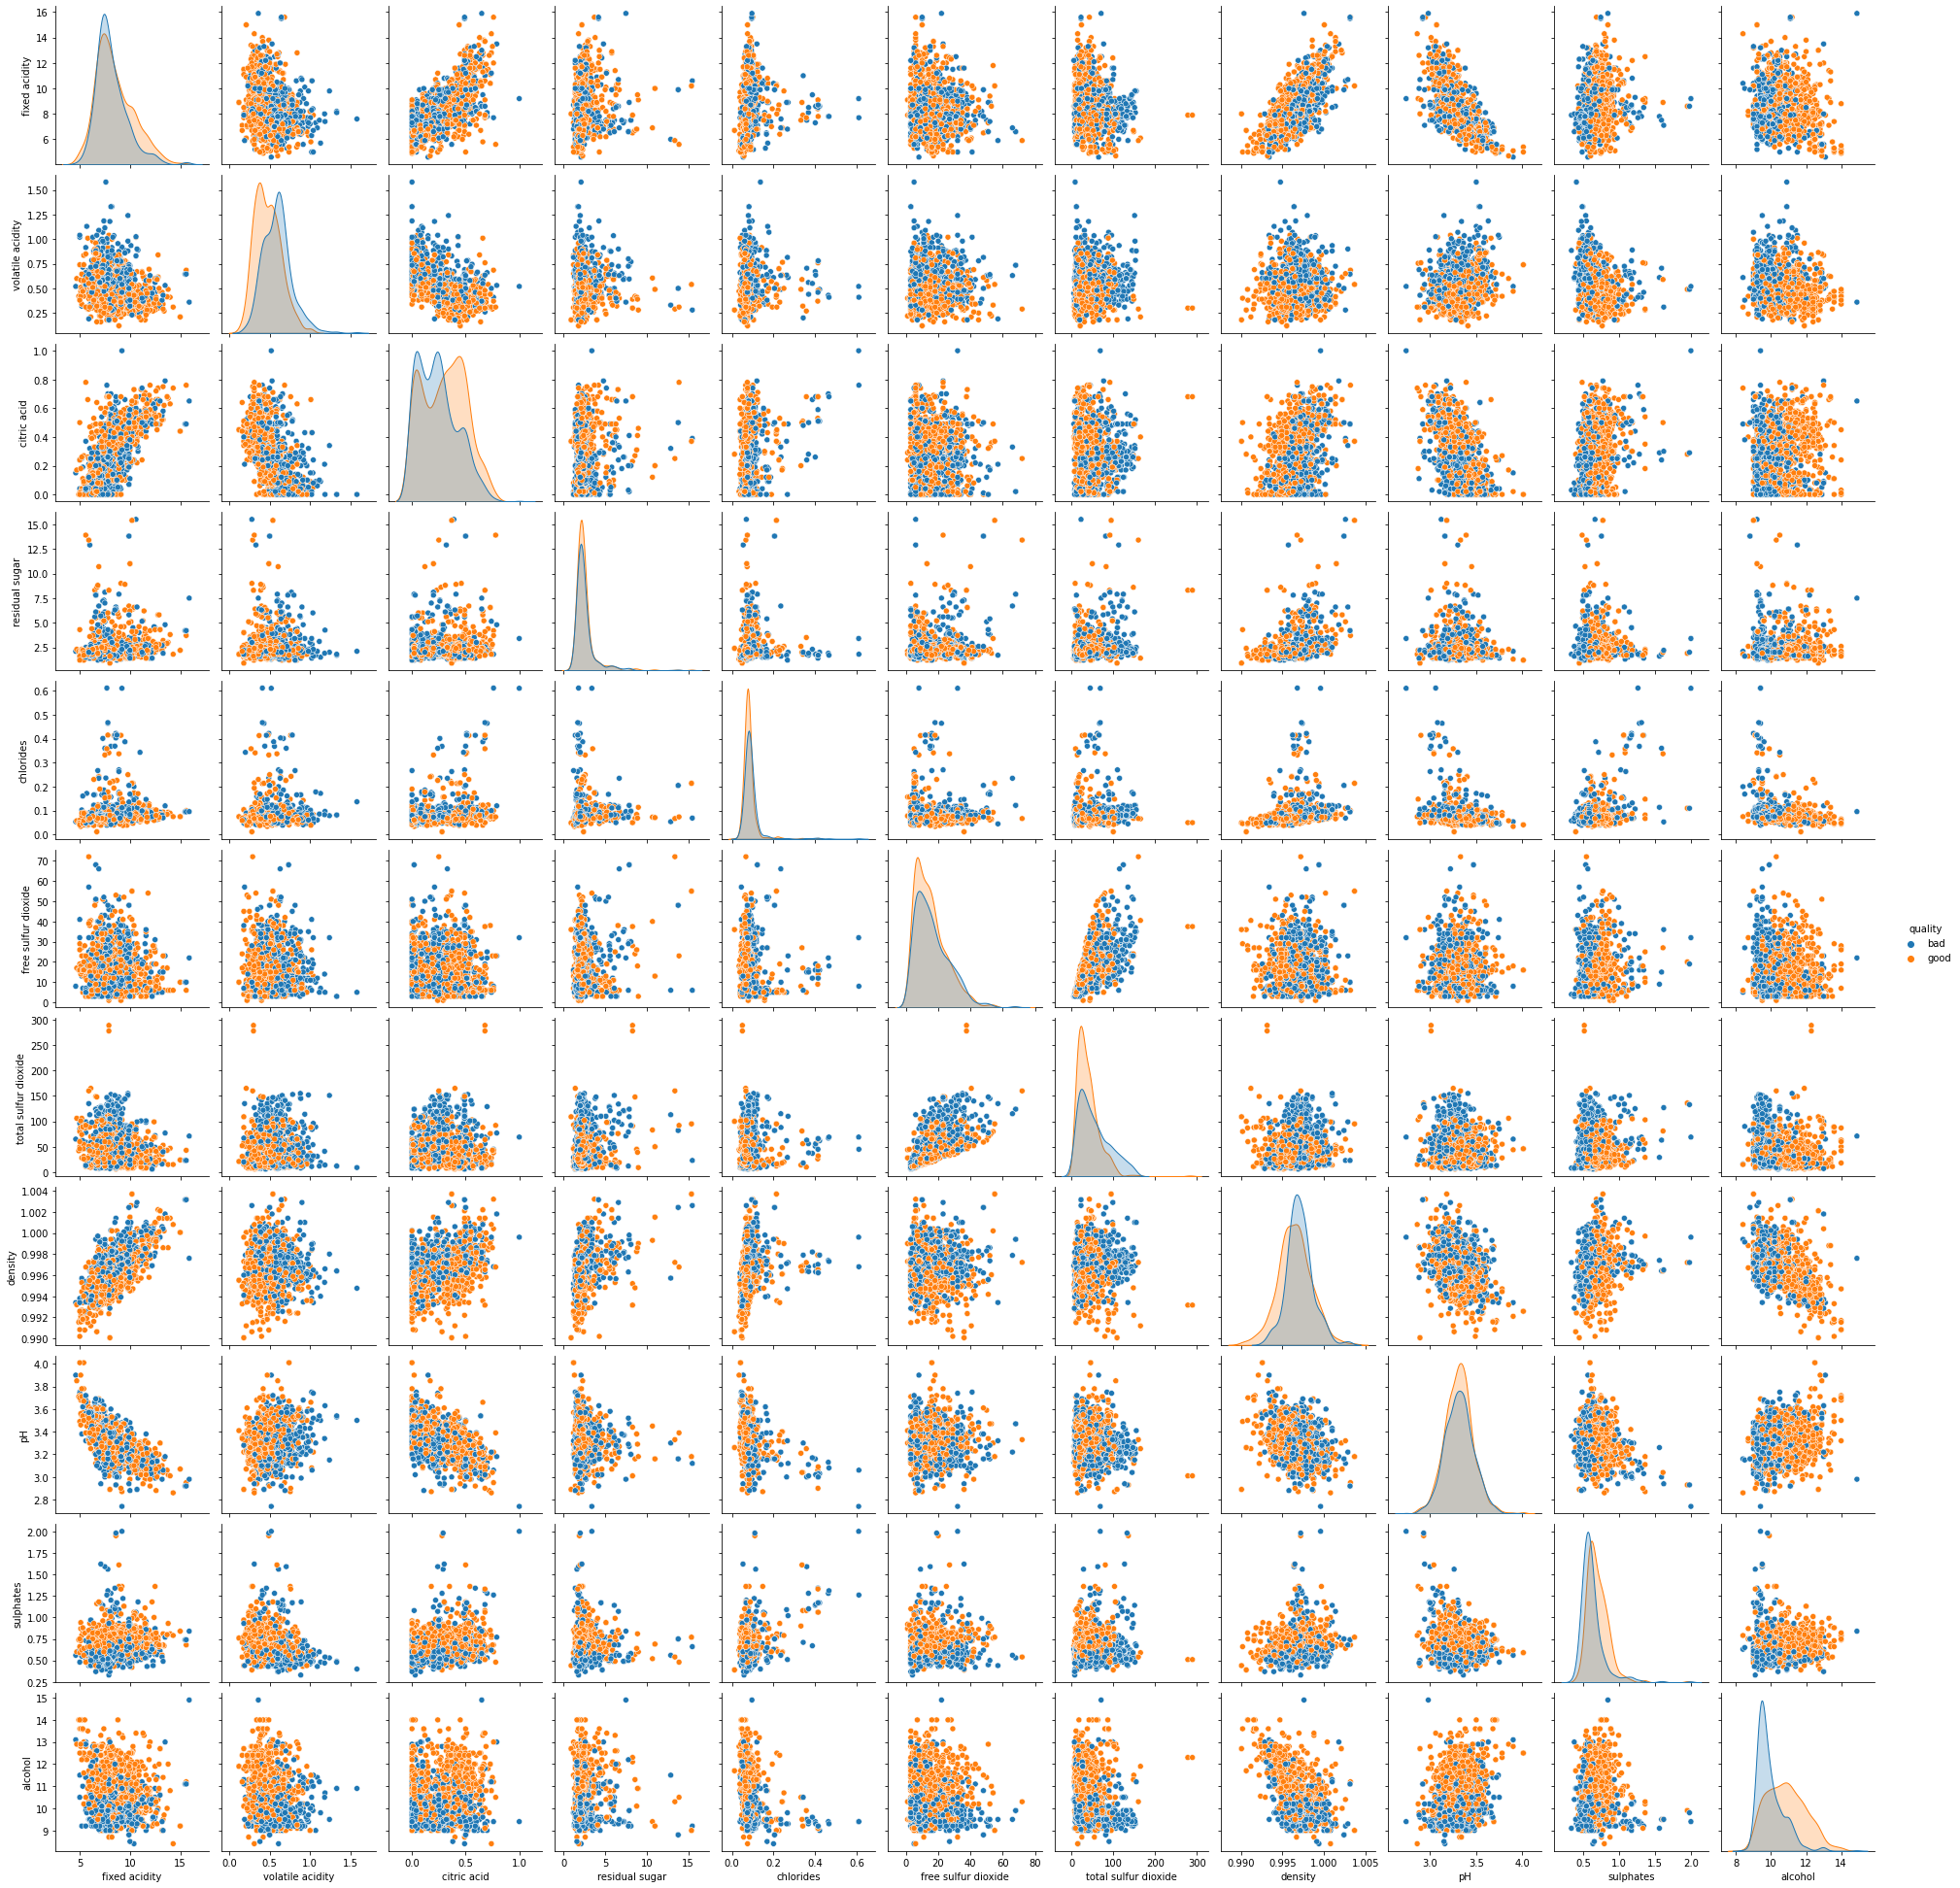

In [5]:
sns.pairplot(data_red, hue="quality")

c:\users\ameli\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

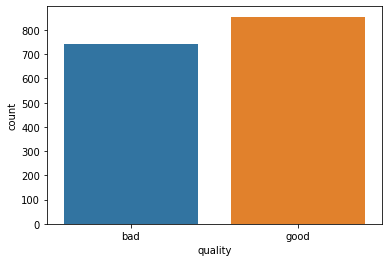

In [6]:
sns.countplot(data_red["quality"])

<AxesSubplot:>

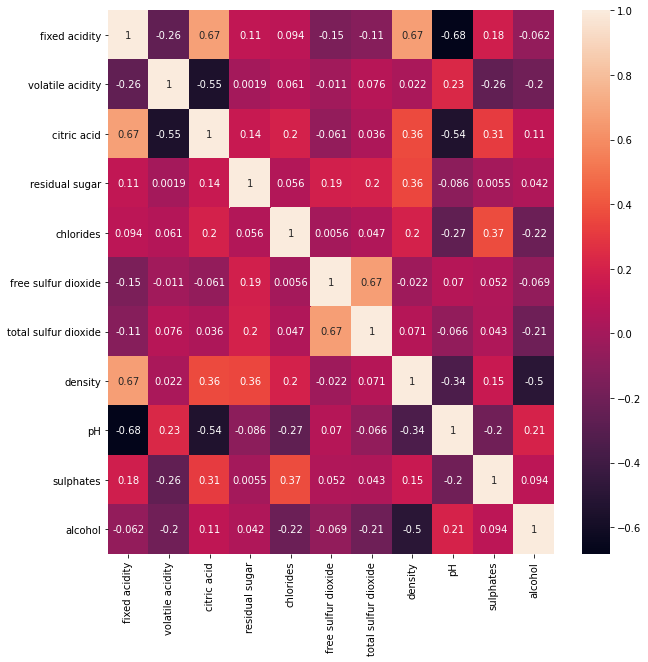

In [7]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data_red.corr(), annot=True)

# Data Preprocessing

In [8]:
# set target = "quality"
X = data_red.drop('quality', axis=1)
y = data_red['quality']

In [9]:
# normalize
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)
X_scaler


array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [10]:
X_normalized = pd.DataFrame(X_scaler, columns=X.columns)
X_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [11]:
#train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size= 0.2, random_state= 42)

In [12]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=3)
selector.fit(X_train, y_train)
X_train_chi = selector.transform(X_train)
X_test_chi = selector.transform(X_test)

# Model

In [13]:
#SVM
from sklearn.svm import SVC
model1 = SVC(kernel="rbf", decision_function_shape="ovo").fit(X_train,y_train)
model2 = SVC(kernel="rbf", decision_function_shape="ovo").fit(X_train_chi,y_train)

In [14]:
print(classification_report(y_test,model1.predict(X_test)))
print(classification_report(y_test,model2.predict(X_test_chi)))

              precision    recall  f1-score   support

         bad       0.70      0.74      0.72       141
        good       0.79      0.75      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

              precision    recall  f1-score   support

         bad       0.69      0.76      0.72       141
        good       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.75      0.74      0.74       320



In [15]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(criterion='entropy').fit(X_train, y_train)
model4 = RandomForestClassifier(criterion='entropy').fit(X_train_chi, y_train)
print(classification_report(y_test, model3.predict(X_test)))
print(classification_report(y_test, model4.predict(X_test_chi)))

              precision    recall  f1-score   support

         bad       0.74      0.78      0.76       141
        good       0.82      0.78      0.80       179

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320

              precision    recall  f1-score   support

         bad       0.79      0.79      0.79       141
        good       0.83      0.84      0.84       179

    accuracy                           0.82       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.82      0.82      0.82       320



In [16]:
#Multilayer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier
model5 = MLPClassifier(hidden_layer_sizes=(50,50,),activation="relu", max_iter=500).fit(X_train, y_train)
model6 = MLPClassifier(hidden_layer_sizes=(50,50,),activation="relu", max_iter=500).fit(X_train_chi, y_train)

print(classification_report(y_test, model5.predict(X_test)))
print(classification_report(y_test, model6.predict(X_test_chi)))

              precision    recall  f1-score   support

         bad       0.70      0.76      0.73       141
        good       0.80      0.74      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

              precision    recall  f1-score   support

         bad       0.68      0.74      0.71       141
        good       0.78      0.73      0.75       179

    accuracy                           0.73       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.74      0.73      0.74       320



# Conclusion

Best Model : 
Random Forest Classifier with feature selection chi2 

-----

data source: https://archive.ics.uci.edu/ml/datasets/Wine+Quality